In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
raw = pd.read_csv('C:\\Users\\ADMIN\\Documents\\Datasets\\BigBasket\\bigBasketCSV.csv')
#raw = pd.read_csv('C:\\Users\\Mk\\Documents\\Datasets\\BigBasket\\bigBasket.csv')

In [3]:
raw.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014,Other Sauces
1,M09736,6468572,15669800,22-09-2014,Cashews
2,M09736,6468572,34989501,22-09-2014,Other Dals
3,M09736,6468572,7572303,22-09-2014,Namkeen
4,M09736,6468572,15669856,22-09-2014,Sugar


#Data Cleaning

In [4]:
#Finding NaN
NanCount = raw.isna().sum()
NanCount

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [5]:
#Finding mistake in text columns
UniqueItems = raw['Description'].unique()
UniqueItems.shape

(216,)

In [6]:
#finding No of transactions
CntTrans = raw['Order'].unique()

In [7]:
CntUniqueItems = np.zeros(len(UniqueItems))
for i in range(len(UniqueItems)):
    CntUniqueItems[i] = raw[raw['Description'] == UniqueItems[i]]['Description'].count()

(array([7.439e+03, 3.052e+03, 1.628e+03, 2.538e+03, 1.082e+04, 3.801e+03,
        5.446e+03, 4.135e+03, 1.889e+03, 1.675e+03, 5.695e+03, 3.018e+03,
        1.282e+03, 5.550e+02, 7.150e+02, 5.240e+02, 2.220e+02, 1.077e+03,
        3.030e+02, 1.579e+03, 4.720e+02, 2.650e+02, 1.750e+02, 4.720e+02,
        8.270e+02, 1.050e+02, 1.770e+02, 7.560e+02, 1.230e+02, 4.500e+02,
        1.250e+02, 8.100e+01, 1.020e+02, 4.800e+01, 4.700e+01, 5.600e+01,
        6.300e+01, 1.410e+02, 1.700e+01, 5.800e+01, 3.700e+01, 1.600e+01,
        4.100e+01, 3.700e+01, 1.600e+01, 8.000e+00, 9.000e+00, 1.200e+01,
        7.000e+00, 5.000e+00]),
 array([  0. ,   4.3,   8.6,  12.9,  17.2,  21.5,  25.8,  30.1,  34.4,
         38.7,  43. ,  47.3,  51.6,  55.9,  60.2,  64.5,  68.8,  73.1,
         77.4,  81.7,  86. ,  90.3,  94.6,  98.9, 103.2, 107.5, 111.8,
        116.1, 120.4, 124.7, 129. , 133.3, 137.6, 141.9, 146.2, 150.5,
        154.8, 159.1, 163.4, 167.7, 172. , 176.3, 180.6, 184.9, 189.2,
        193.5, 197.8,

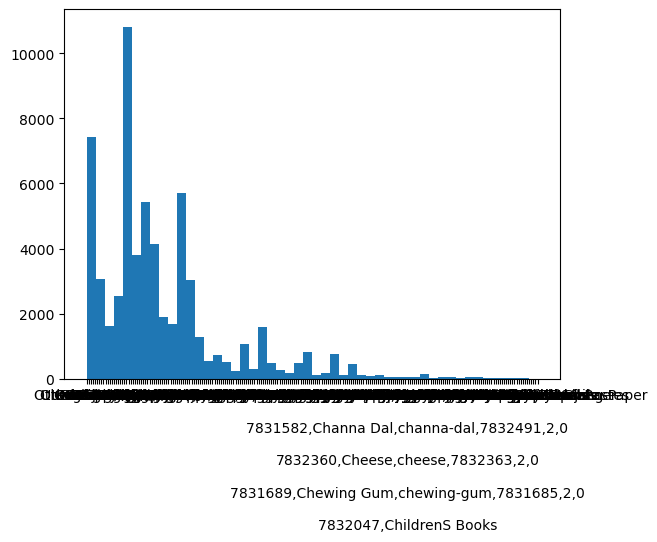

In [8]:
plt.hist(raw['Description'], bins=50)

In [9]:
UniqueItems.sort()

In [10]:
#for i in range(len(UniqueItems)):
#    print(UniqueItems[i],'\n')

Modify following Items
Festive Gift Pack, Festive Gift Packs 
Soup, Soups
Toilet Cleaners, Toilet Cleaning

In [11]:
# Replace item names
#UniqueItems = raw['Description'].unique()
raw_process = raw.copy()
raw_process['Description'] = raw_process['Description'].replace('Festive Gift Pack', 'Festive Gift Packs')
raw_process['Description'] = raw_process['Description'].replace('Soup', 'Soups')
raw_process['Description'] = raw_process['Description'].replace('Toilet Cleaning', 'Toilet Cleaners')


In [12]:
#Change 'Created On' to Date Format YYYY-MM-DD
raw_process['Created On'] = pd.to_datetime(raw['Created On'], dayfirst=True)

In [13]:
#Check dates are consecutive
raw_process['Created On Temp'] = raw_process['Created On']
raw_process['Created On Temp'] = raw_process['Created On'][1:]
if ~(len(raw_process[raw_process['Created On Temp']<raw_process['Created On']])):
    print('Dates are consecutive')
else:
    print('Dates are not consecutive')

Dates are consecutive


#Data Cleaning is completed

# Product Wise Analysis
## Data Preparation

In [14]:
y = pd.get_dummies(raw_process[['Order', 'Description']],  dtype=float, prefix='')

In [15]:
y.head()

,Order,_After Shave,_Agarbatti,_Almonds,_Aluminium Foil & Cling Wrap,_Antiseptics,_Avalakki / Poha,_Ayurvedic,_Ayurvedic Food,_Baby Care Accessories,...,_Vanaspati,_Veg & Fruit,_Vermicelli,_Vinegar,_Wafers,_Washing Bars,_Whole Grains,_Whole Spices,_Womens Deo,_Yogurt & Lassi
0,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
OneHotCoded = y.groupby(y['Order']).sum()
OneHotCoded.replace(0,np.nan)

,_After Shave,_Agarbatti,_Almonds,_Aluminium Foil & Cling Wrap,_Antiseptics,_Avalakki / Poha,_Ayurvedic,_Ayurvedic Food,_Baby Care Accessories,_Baby Cereal,...,_Vanaspati,_Veg & Fruit,_Vermicelli,_Vinegar,_Wafers,_Washing Bars,_Whole Grains,_Whole Spices,_Womens Deo,_Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,
6422558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6422636,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
6423338,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6423534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6423959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8387967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8388196,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [17]:
OneHotCoded.head()

,_After Shave,_Agarbatti,_Almonds,_Aluminium Foil & Cling Wrap,_Antiseptics,_Avalakki / Poha,_Ayurvedic,_Ayurvedic Food,_Baby Care Accessories,_Baby Cereal,...,_Vanaspati,_Veg & Fruit,_Vermicelli,_Vinegar,_Wafers,_Washing Bars,_Whole Grains,_Whole Spices,_Womens Deo,_Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,
6422558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6422636,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6423338,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6423534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6423959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#TEST CODE
"""temp = df_new.iloc[2]>0
temp = temp.to_numpy()
df_new.iloc[2,temp]"""

'temp = df_new.iloc[2]>0\ntemp = temp.to_numpy()\ndf_new.iloc[2,temp]'

## Items Moving Frequency

In [19]:
Column_sum = np.zeros(OneHotCoded.shape[1])
Column_avg = np.zeros(OneHotCoded.shape[1])
column_std = np.zeros(OneHotCoded.shape[1])
for i in range(OneHotCoded.shape[1]):
    Column_sum[i] = OneHotCoded.iloc[:,i].sum()
    Column_avg[i] = OneHotCoded.iloc[:,i].mean()
    column_std[i] = OneHotCoded.iloc[:,i].std()

In [20]:
d = {'Items': OneHotCoded.columns, 'Sum': Column_sum, 'Avg': Column_avg, 'STD': column_std}
df_new = pd.DataFrame(d)
df_new = df_new.sort_values(by=['Sum'])
sum_col = df_new['Sum'].to_numpy()
meanval = df_new['Sum'].mean()
stdval = df_new['Sum'].std()

In [21]:
from scipy.stats import norm
probability_pdf = norm.pdf(3, loc=meanval, scale=stdval)


<Axes: xlabel='Items'>

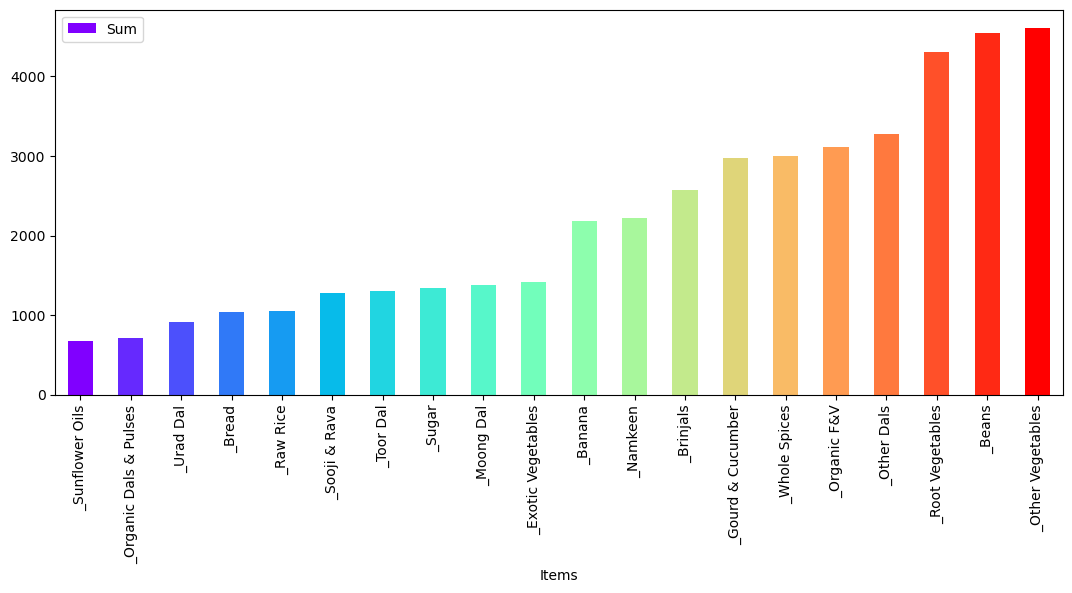

In [22]:
color = plt.cm.rainbow(np.linspace(0, 1, 20))
df_new.tail(20).plot.bar(x='Items', y='Sum',color=color, figsize=(13,5))

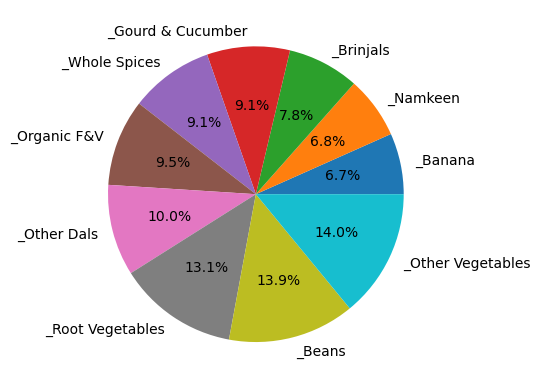

In [23]:
plt.pie(df_new['Sum'].tail(10), labels = df_new['Items'].tail(10), autopct='%1.1f%%')
plt.show() 

<Axes: xlabel='Items'>

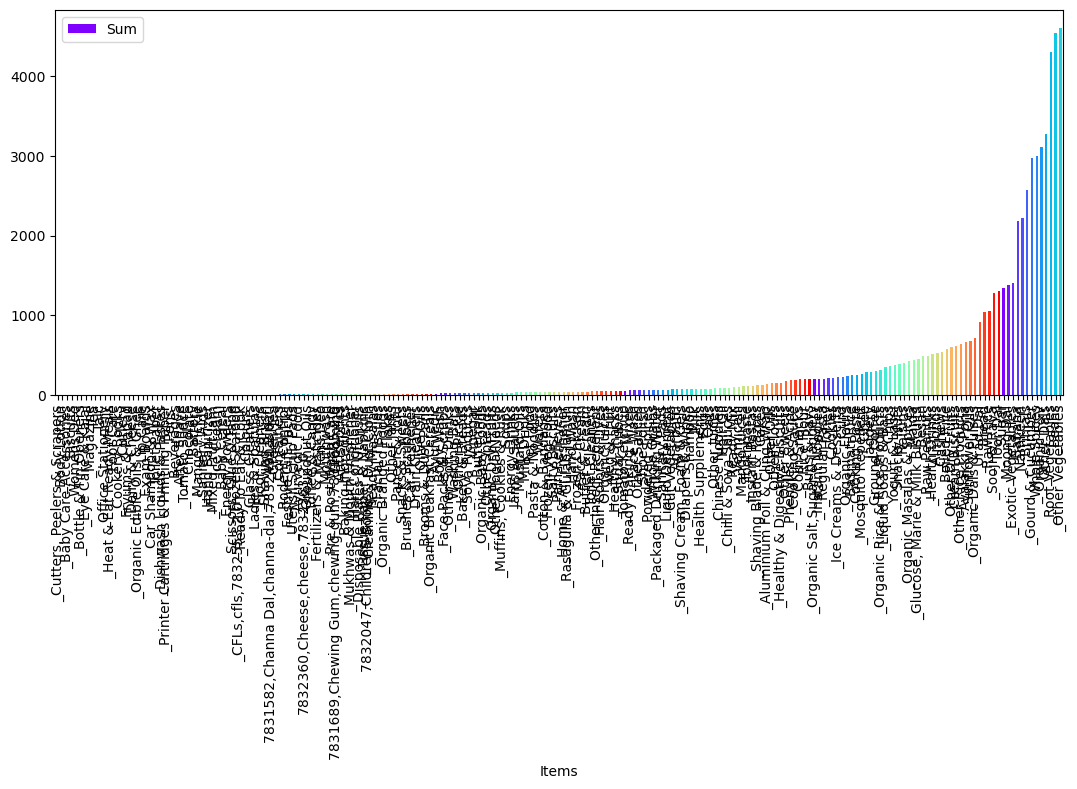

In [24]:
df_new = df_new.sort_values(by=['Sum'])
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df_new.plot.bar(x='Items', y='Sum',color=color, figsize=(13,5))

In [25]:
# Fast, Medium and Slow Moving Items
UT = 2000
LT = 300

FastMoveItems = df_new[df_new['Sum']>UT] #Tune threshold value
#print(FastMoveItems)
MedMoveItems = df_new[(df_new['Sum']<=UT) & (df_new['Sum']>=LT)] #Tune threshold value
#print(MedMoveItems)
SlowMoveItems = df_new[df_new['Sum']<LT] #Tune threshold value
print('Fast Moving Items: ', len(FastMoveItems), 'Avg Moving Items: ', len(MedMoveItems), 'Slow MovingItems: ', len(SlowMoveItems))

Fast Moving Items:  10 Avg Moving Items:  29 Slow MovingItems:  174


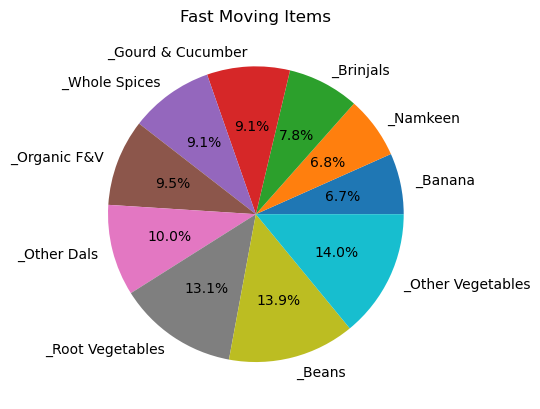

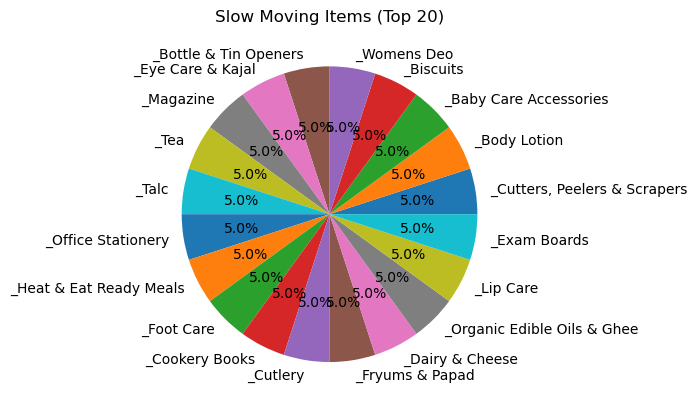

In [26]:
plt.pie(FastMoveItems['Sum'], labels = FastMoveItems['Items'], autopct='%1.1f%%')
plt.title('Fast Moving Items')
plt.show() 

plt.pie(SlowMoveItems['Sum'].head(20), labels = SlowMoveItems['Items'].head(20), autopct='%1.1f%%')
plt.title('Slow Moving Items (Top 20)')
plt.show() 

## Average Sale per month

In [27]:
#raw_process['Temp'] = pd.Timestamp(raw_process['Created On'])
raw_process['Year'] = raw_process['Created On'].dt.year
raw_process['Month'] = raw_process['Created On'].dt.month
raw_process['Day'] = raw_process['Created On'].dt.day
raw_process['Week'] = raw_process['Created On'].dt.isocalendar().week
raw_process['Description'] = "_" + raw_process['Description']
raw_process.head()

,Member,Order,SKU,Created On,Description,Created On Temp,Year,Month,Day,Week
0,M09736,6468572,34993740,2014-09-22,_Other Sauces,NaT,2014,9,22,39
1,M09736,6468572,15669800,2014-09-22,_Cashews,2014-09-22,2014,9,22,39
2,M09736,6468572,34989501,2014-09-22,_Other Dals,2014-09-22,2014,9,22,39
3,M09736,6468572,7572303,2014-09-22,_Namkeen,2014-09-22,2014,9,22,39
4,M09736,6468572,15669856,2014-09-22,_Sugar,2014-09-22,2014,9,22,39


In [28]:
StartDate = min(raw_process['Created On'])
EndDate = max(raw_process['Created On'])
print('Start Date: ', StartDate, 'End Date: ', EndDate)

Start Date:  2011-03-12 00:00:00 End Date:  2014-12-09 00:00:00


In [52]:
#Calculate Total Monthly Sales and Average Sale per day
f = np.array(FastMoveItems['Items'])
m = np.array(MedMoveItems['Items'])
s = np.array(SlowMoveItems['Items'])
TotMonths = np.ceil((EndDate - StartDate)/np.timedelta64(1, 'M')).astype(int)
DateArr = []
# Monthly total sale
MonthlyFastMoveItems = [] #Monthly Total sales Fast Moving item
MonthlyMedMoveItems =  [] #Monthly Total sales Medium Moving item
MonthlySlowMoveItems =  [] #Monthly Total sales Slow Moving item
# Monthly Average per day sale
AvgSaleFMI =[] #Monthly Average sales per day Fast Moving item
AvgSaleMMI =[] #Monthly Average sales per day Medium Moving item
AvgSaleSMI =[] #Monthly Average sales per day Slow Moving item
DaysArr = [] #No of days in month
for i in range(TotMonths):
    CurrMonth = StartDate + pd.DateOffset(months=i)
    CurrMonth = str(CurrMonth.year) + '-' + str(CurrMonth.month)
    NextMonth = StartDate + pd.DateOffset(months=i+1)
    NextMonth = str(NextMonth.year) + '-' + str(NextMonth.month)    
    df_month = raw_process[((raw_process['Created On'] >= CurrMonth) & (raw_process['Created On'] < NextMonth))]
    Days = df_month['Day'].unique()    
    if len(Days) != 0:
        DaysArr.append(len(Days))
        AvgSaleFMI.append(df_month.Description.isin(f).sum()/len(Days))
        AvgSaleMMI.append(df_month.Description.isin(m).sum()/len(Days))
        AvgSaleSMI.append(df_month.Description.isin(s).sum()/len(Days))
        DateArr.append(CurrMonth)
        MonthlyFastMoveItems.append(df_month.Description.isin(f).sum())
        MonthlyMedMoveItems.append(df_month.Description.isin(m).sum())
        MonthlySlowMoveItems.append(df_month.Description.isin(s).sum())
    else:
        print("No Sale data for ", CurrMonth)

AvgSaleFMI = np.array(AvgSaleFMI)
AvgSaleMMI = np.array(AvgSaleMMI)
AvgSaleSMI = np.array(AvgSaleSMI)

No Sale data for  2011-5
No Sale data for  2011-6
No Sale data for  2011-9
No Sale data for  2011-10
No Sale data for  2011-11


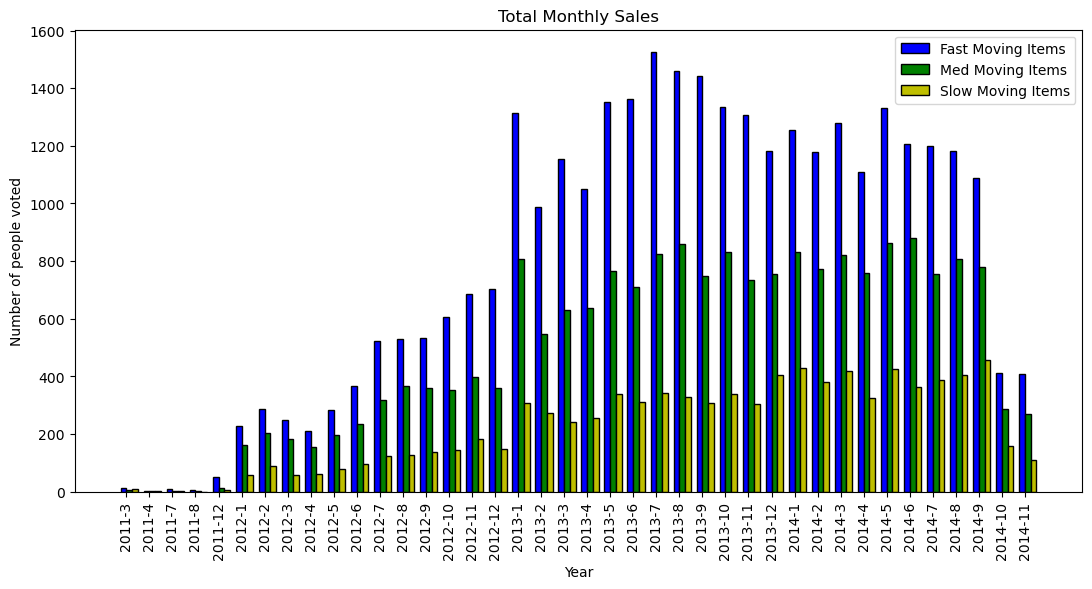

In [31]:
r = np.arange(len(DateArr)) 
width = 0.25  
plt.figure(figsize=(13,6))  
plt.bar(DateArr, MonthlyFastMoveItems, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Fast Moving Items') 
plt.bar(r + width, MonthlyMedMoveItems, color = 'g', 
        width = width, edgecolor = 'black', 
        label='Med Moving Items') 
plt.bar(r + 2*width, MonthlySlowMoveItems, color = 'y', 
        width = width, edgecolor = 'black', 
        label='Slow Moving Items') 
  
plt.xlabel("Year") 
plt.ylabel("Total Sales") 
plt.title("Total Monthly Sales by item category") 
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,DateArr, rotation = 90) 
plt.legend() 
  
plt.show() 

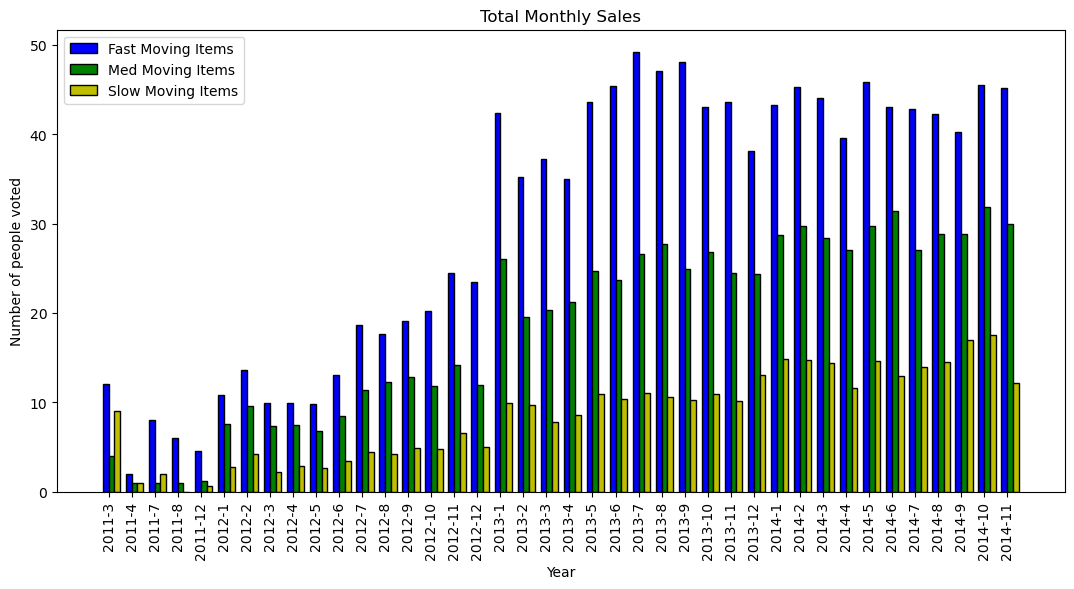

In [32]:
r = np.arange(len(DateArr)) 
width = 0.25  
plt.figure(figsize=(13,6))  
plt.bar(DateArr, AvgSaleFMI, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Fast Moving Items') 
plt.bar(r + width, AvgSaleMMI, color = 'g', 
        width = width, edgecolor = 'black', 
        label='Med Moving Items') 
plt.bar(r + 2*width, AvgSaleSMI, color = 'y', 
        width = width, edgecolor = 'black', 
        label='Slow Moving Items') 
  
plt.xlabel("Year") 
plt.ylabel("Average Sales") 
plt.title("Average Monthly Sales per day") 
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,DateArr, rotation = 90) 
plt.legend() 
  
plt.show() 

In [67]:
# Percentage change in monthly average sales per day
AvgSaleFMI = np.array(AvgSaleFMI)
AvgSaleMMI = np.array(AvgSaleMMI)
AvgSaleSMI = np.array(AvgSaleSMI)
temp = np.diff(AvgSaleFMI)

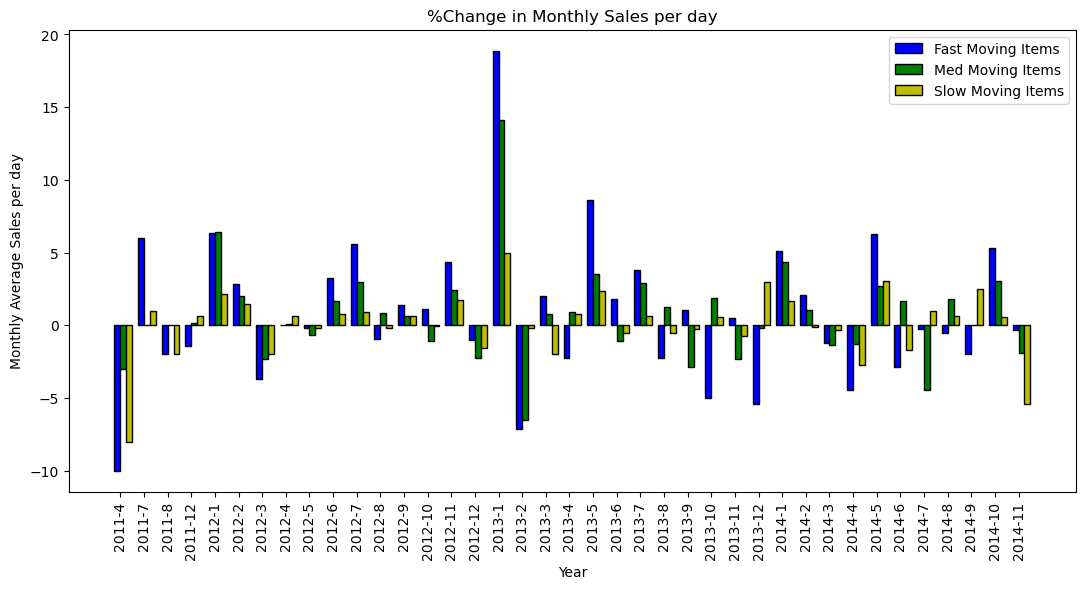

In [71]:
r = np.arange(len(DateArr)-1) 
width = 0.25  
plt.figure(figsize=(13,6))  
plt.bar(r, np.diff(AvgSaleFMI), color = 'b', 
        width = width, edgecolor = 'black', 
        label='Fast Moving Items') 
plt.bar(r + width, np.diff(AvgSaleMMI), color = 'g', 
        width = width, edgecolor = 'black', 
        label='Med Moving Items') 
plt.bar(r + 2*width, np.diff(AvgSaleSMI), color = 'y', 
        width = width, edgecolor = 'black', 
        label='Slow Moving Items') 
  
plt.xlabel("Year") 
plt.ylabel("Monthly Average Sales per day") 
plt.title("%Change in Monthly Sales per day") 
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2, DateArr[1:], rotation = 90) 
plt.legend() 
  
plt.show() 

In [45]:
TotalSale = [MonthlyFastMoveItems[i] + MonthlyMedMoveItems[i] + MonthlySlowMoveItems[i] for i in range(len(MonthlyFastMoveItems))]

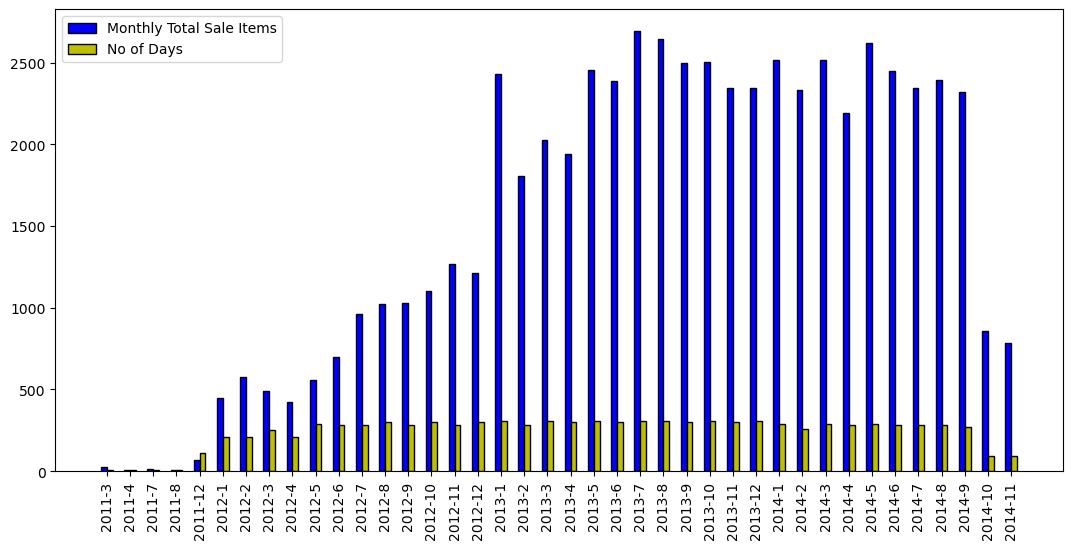

In [62]:
DaysArr = np.array(DaysArr)
r = np.arange(len(DateArr)) 
width = 0.25 

plt.figure(figsize=(13,6))  
plt.bar(r, TotalSale, color = 'b', 
        width = width, edgecolor = 'black', 
        label='Monthly Sold Items')
plt.bar(r+width, DaysArr*10, color = 'y', 
        width = width, edgecolor = 'black', 
        label='No of Days') 
plt.xticks(r + width/2, DateArr, rotation = 90)
plt.legend()
plt.show() 

In [82]:
DateArr =  np.array(DateArr)
MeanDays=DaysArr.mean()
StdDays=DaysArr.std()
print(MeanDays, StdDays)
print("Ignore Months from dataset:", DateArr[DaysArr<(MeanDays-StdDays)]) #Ignore months with days less than (MeanDays-1*StdDays)

24.225 9.50391366753718
['2011-3' '2011-4' '2011-7' '2011-8' '2011-12' '2014-10' '2014-11']


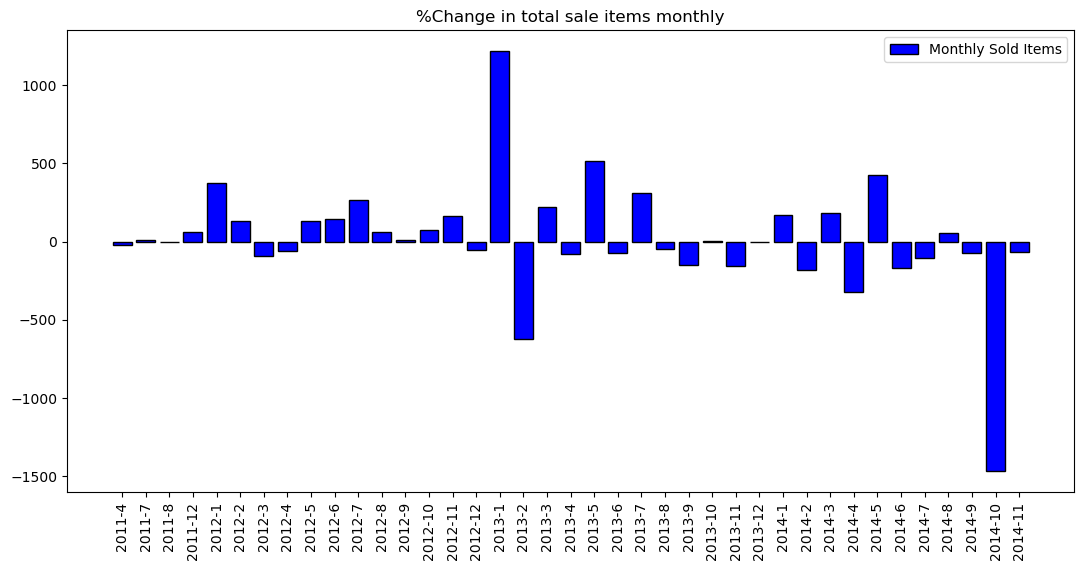

In [87]:
TotalSale = np.array(TotalSale)
prcntDiffSale = np.diff(TotalSale)
r = np.arange(len(DateArr)-1) 
plt.figure(figsize=(13,6))  
plt.bar(r, prcntDiffSale, color = 'b',  edgecolor = 'black', 
        label='Monthly Sold Items')
plt.xticks(r, DateArr[1:], rotation = 90)
plt.legend()
plt.title('%Change in total sale items monthly')
plt.show() 

In [92]:
#Identify Months with steep increase and decrease in sales
MeanSale = prcntDiffSale.mean()
StdSale = prcntDiffSale.std()
Temp = DateArr[1:]
print("Steep Increase in sales months:", Temp[prcntDiffSale>(MeanSale+StdSale)])
print("Steep Decrease in sales months:", Temp[prcntDiffSale<(MeanSale-StdSale)])

Steep Increase in sales months: ['2013-1' '2013-5' '2014-5']
Steep Decrease in sales months: ['2013-2' '2014-10']


In [85]:
MeanSale

1532.825